In [31]:
import pandas as pd
import numpy as np

In [67]:
univ_df = pd.read_csv("google.csv")
univ_df

,date,open,high,low,close,volume,Name
0,2014-03-27,568.000,568.00,552.92,558.46,13052,GOOG
1,2014-03-28,561.200,566.43,558.67,559.99,41003,GOOG
2,2014-03-31,566.890,567.00,556.93,556.97,10772,GOOG
3,2014-04-01,558.710,568.45,558.71,567.16,7932,GOOG
4,2014-04-02,565.106,604.83,562.19,567.00,146697,GOOG
...,...,...,...,...,...,...,...
970,2018-02-01,1162.610,1174.00,1157.52,1167.70,2412114,GOOG
971,2018-02-02,1122.000,1123.07,1107.28,1111.90,4857943,GOOG
972,2018-02-05,1090.600,1110.00,1052.03,1055.80,3798301,GOOG
973,2018-02-06,1027.180,1081.71,1023.14,1080.60,3447956,GOOG


In [71]:
import scipy.stats as stats
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OrdinalEncoder

# Выберем модель классификатора - DecisionTreeClassifier

dtc = DecisionTreeClassifier()
newDf = univ_df.copy()
newDf = newDf.drop (index=119)

# Установим совокупность настраиваемых параметров
params = { 'max_depth': range (1, 20, 1),
              'min_samples_leaf': range (1, 10, 2),
              'min_samples_split': range (1,10,5) }

ordEnc = OrdinalEncoder()

# Для поиска наилучших значений, воспользуемся GridSearchCV
grid = GridSearchCV(dtc, params, cv = 5, n_jobs = -1)
newDf["Name"] = ordEnc.fit_transform(newDf[["Name"]]).astype(int)
newDf["date"] = ordEnc.fit_transform(newDf[["date"]]).astype(int)
X_train = np.array(newDf.iloc[:,:-1])
y_train = np.array(newDf["Name"])
grid.fit(X_train, y_train)

C:\Users\maxim\PycharmProjects\pythonProject\venv\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
475 fits failed out of a total of 950.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
475 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\maxim\PycharmProjects\pythonProject\venv\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\maxim\PycharmProjects\pythonProject\venv\lib\site-packages\sklearn\tree\_classes.py", line 889, in fit
    super().fit(
  File "C:\Users\maxim\PycharmProjects\pythonProject\venv\lib\site-packages\sklearn\tree\_classes.py", line 177, in fit


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(1, 20),
                         'min_samples_leaf': range(1, 10, 2),
                         'min_samples_split': range(1, 10, 5)})

In [33]:
#2. Выполнить подбор параметров модели классификатора и регрессора (по выбору) с использованием GridSearchCV:
#1. Выбрать какую-нибудь модель классификатора (KNeighborsClassifier, DecisionTreeClassifier, Наивный Байес, LogisticRegression...):

   # 1.1. Выбрать совокупность настраиваемых параметров и диапазоны их значений

    #1.2. Реализовать поиск наилучших параметров с использованием GridSearchCV

    #1.3. Вывести наилучшие найденные значения параметров и соответствующую метрику качества классификации

In [58]:
import scipy.stats as stats
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OrdinalEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

# Выберем модель регрессора - DecisionTreeRegressor
dtr= DecisionTreeRegressor(random_state=0, criterion="absolute_error")
newDfRg = univ_df.copy()
newDfRg = newDfRg.drop (index=119)

# Установим совокупность настраиваемых параметров
params = { 'max_depth': (5, 20, 1),
              'min_samples_leaf': (1, 10, 2),
              'min_samples_split': (1,10,5) }

ordEnc = OrdinalEncoder()

# Для поиска наилучших значений, воспользуемся GridSearchCV
gridRg = GridSearchCV(dtr, params, cv = 5, n_jobs = -1)
newDfRg["Name"] = ordEnc.fit_transform(newDfRg[["Name"]]).astype(int)
X = np.array(newDfRg[["volume", "Name"]])
y = np.array(newDfRg["volume"])
gridRg.fit(X, y)

print(f"Наилучшие значения параметров: {gridRg.best_params_}")
print(f"Наилучшее значение метрики: {gridRg.best_score_}")

Наилучшие значения параметров: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5}
Наилучшее значение метрики: 0.9811587808625746


C:\Users\maxim\PycharmProjects\pythonProject\venv\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
45 fits failed out of a total of 135.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\maxim\PycharmProjects\pythonProject\venv\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\maxim\PycharmProjects\pythonProject\venv\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\maxim\PycharmProjects\pythonProject\venv\lib\site-packages\sklearn\tree\_classes.py", line 177, in fit
 

In [6]:
#3. Решить задачу классификации с использованием случайного леса (RandomForestClassifier):
#1. С помощью GridSearchCV подобрать наилучшие параметры случайного леса для задачи классификации

In [61]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

iris = load_iris()

X = np.array(newDfRg[["Name", "high", "low", "close"]])
y = np.array(newDfRg["volume"])

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, train_size = 0.75)

# В качестве модели классификатора будем использовать - RandomForestClassifier
forest = RandomForestClassifier(n_estimators = 5)
forest.fit(X_train, y_train)

# Проверим, насколько хорошо модель подстроилась под обучающие данные

print("Точность на обучающем наборе: {:.3f}".format(forest.score(X_train, y_train)))
print("Точность на тестовом наборе: {:.3f}".format(forest.score(X_test, y_test)))
params = {  "n_estimators": range(3,15),
            'max_depth': range (2, 15, 1),
            'min_samples_leaf': range (1, 10),
            'min_samples_split': range (2,10,2) }

gridRf = GridSearchCV(forest, params, cv = 5, n_jobs = -1)
gridRf.fit(X_train, y_train)

# Оценим качество модели при помощи метрик

print(f"Наилучшие значения параметров: {gridRf.best_params_}")
print(f"Наилучшее значение метрики: {gridRf.best_score_}")

Точность на обучающем наборе: 0.991
Точность на тестовом наборе: 0.921
Наилучшие значения параметров: {'max_depth': 2, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 12}
Наилучшее значение метрики: 0.9913043478260869


In [ ]:
#2. С полученными параметрами вычислить метрики качества классификации (Confusion Matrix, ROC + AUC)

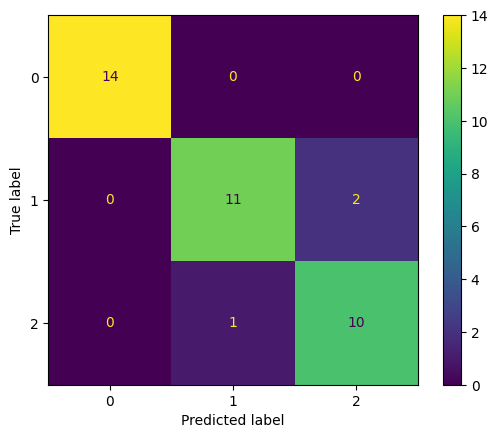

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.92      0.85      0.88        13
           2       0.83      0.91      0.87        11

    accuracy                           0.92        38
   macro avg       0.92      0.92      0.92        38
weighted avg       0.92      0.92      0.92        38



In [62]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve

y_train_predict = gridRf.predict(X_train)
y_test_predict = gridRf.predict(X_test)
y_test_prob = gridRf.predict_proba(X_test)[:,0]
confMatrTd = confusion_matrix(y_test, y_test_predict)
cmPltTd = ConfusionMatrixDisplay(confusion_matrix = confMatrTd)
cmPltTd.plot()
plt.show()
print(classification_report(y_test, y_test_predict))

In [10]:
#4. Реализовать ансамбли моделей для задачи классификации и регрессии
#1. Реализовать бэггинг BaggingClassifier на базе любой модели классификации

In [92]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# произведем стандартизацию
scaled_data = scaler.fit_transform(newDfRg)

X = np.array(newDfRg[["Name", "high", "low", "close"]])
y = np.array(newDfRg["volume"])

# разделяем данные на обучающие и тестовые наборы
X_trainBg, X_testBg, y_trainBg, y_testBg = train_test_split( X, y, test_size = 0.2 )

# создаем базовый алгоритм KNeighborsClassifier
base_model = KNeighborsClassifier()

bagging_model = BaggingClassifier(n_estimators = 10, random_state = 42 )

# обучаем модель на обучающих данных
bagging_model.fit( X_trainBg, y_trainBg )

# делаем предсказания на тестовых данных
y_pred = bagging_model.predict( X_testBg )

ValueError: could not convert string to float: '2014-03-27'

In [65]:
#2. С полученными параметрами вычислить метрики качества классификации (Confusion Matrix, ROC + AUC)

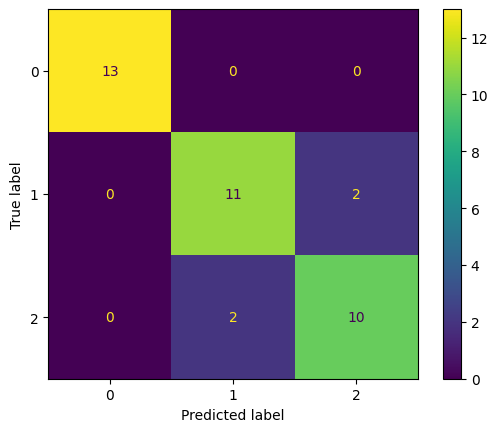

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.85      0.85      0.85        13
           2       0.83      0.83      0.83        12

    accuracy                           0.89        38
   macro avg       0.89      0.89      0.89        38
weighted avg       0.89      0.89      0.89        38



In [19]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve

y_train_predict = gridRf.predict(X_train)
y_test_predict = gridRf.predict(X_test)
y_test_prob = gridRf.predict_proba(X_test)[:,0]
confMatrTd = confusion_matrix(y_test, y_test_predict)
cmPltTd = ConfusionMatrixDisplay(confusion_matrix = confMatrTd)
cmPltTd.plot()
plt.show()
print(classification_report(y_test, y_test_predict))

In [93]:
#3. При запуске перебора значений на сетке (полный перебор) полезно использовать опцию параллельных вычислений *n_jobs* (количество параллельных процессов). Значение -1 задействует все вычислительные ядра ЦП.

In [102]:
import scipy.stats as stats
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OrdinalEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

# Выберем модель регрессора - DecisionTreeRegressor
dtr= DecisionTreeRegressor(random_state=0, criterion="absolute_error")
newDfRg = univ_df.copy()
newDfRg = newDfRg.drop (index=119)

# Установим совокупность настраиваемых параметров
params = { 'max_depth': (5, 20, 1),
              'min_samples_leaf': (1, 10, 2),
              'min_samples_split': (1,10,5) }

ordEnc = OrdinalEncoder()

# Для поиска наилучших значений, воспользуемся GridSearchCV
gridRg = GridSearchCV(dtr, params, cv = 5, n_jobs = -1)
newDfRg["Name"] = ordEnc.fit_transform(newDfRg[["Name"]]).astype(int)
X = np.array(newDfRg[["date", "Name"]])
y = np.array(newDfRg["date"])


In [ ]:
#3. Решить задачу классификации с использованием случайного леса (RandomForestClassifier):
#1. С помощью GridSearchCV подобрать наилучшие параметры случайного леса для задачи классификации

In [103]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

iris = load_iris()

X = np.array(newDfRg[["Name", "high", "low", "close"]])
y = np.array(newDfRg["volume"])

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, train_size = 0.75)

# В качестве модели классификатора будем использовать - RandomForestClassifier
forest = RandomForestClassifier(n_estimators = 5)
forest.fit(X_train, y_train)

# Проверим, насколько хорошо модель подстроилась под обучающие данные

print("Точность на обучающем наборе: {:.3f}".format(forest.score(X_train, y_train)))
print("Точность на тестовом наборе: {:.3f}".format(forest.score(X_test, y_test)))
params = {  "n_estimators": range(3,15),
            'max_depth': range (2, 15, 1),
            'min_samples_leaf': range (1, 10),
            'min_samples_split': range (2,10,2) }

gridRf = GridSearchCV(forest, params, cv = 5, n_jobs = -1)
gridRf.fit(X_train, y_train)

# Оценим качество модели при помощи метрик

print(f"Наилучшие значения параметров: {gridRf.best_params_}")
print(f"Наилучшее значение метрики: {gridRf.best_score_}")

Точность на обучающем наборе: 0.982
Точность на тестовом наборе: 0.947
Наилучшие значения параметров: {'max_depth': 9, 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 7}
Наилучшее значение метрики: 0.9735177865612649


In [ ]:
#2. С полученными параметрами вычислить метрики качества классификации (Confusion Matrix, ROC + AUC)

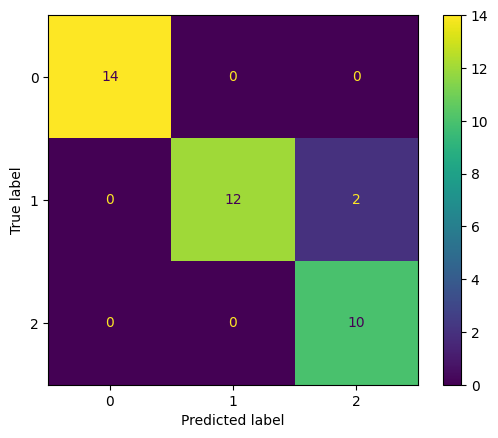

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.86      0.92        14
           2       0.83      1.00      0.91        10

    accuracy                           0.95        38
   macro avg       0.94      0.95      0.94        38
weighted avg       0.96      0.95      0.95        38



In [104]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve

y_train_predict = gridRf.predict(X_train)
y_test_predict = gridRf.predict(X_test)
y_test_prob = gridRf.predict_proba(X_test)[:,0]
confMatrTd = confusion_matrix(y_test, y_test_predict)
cmPltTd = ConfusionMatrixDisplay(confusion_matrix = confMatrTd)
cmPltTd.plot()
plt.show()
print(classification_report(y_test, y_test_predict))

In [83]:
#4. Реализовать составы для решения по делу об аресте и регрессии.
#1. Реализовать бэггинг BaggingClassifier на базе любой модели классификации

In [106]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# произведем стандартизацию

X = np.array(newDfRg[["Name", "high", "low", "close"]])
y = np.array(newDfRg["volume"])

# разделяем данные на обучающие и тестовые наборы
X_trainBg, X_testBg, y_trainBg, y_testBg = train_test_split( X, y, test_size = 0.2 )

# создаем базовый алгоритм KNeighborsClassifier
base_model = KNeighborsClassifier()

bagging_model = BaggingClassifier(n_estimators = 10, random_state = 42 )

# обучаем модель на обучающих данных
bagging_model.fit( X_trainBg, y_trainBg )

# делаем предсказания на тестовых данных
y_pred = bagging_model.predict( X_testBg )
#Вычислим метрики качества классификации (Confusion Matrix, ROC + AUC):

y_train_predictBg = bagging_model.predict(X_trainBg)
y_test_predictBg = bagging_model.predict(X_testBg)
y_test_probBg = bagging_model.predict_proba(X_testBg)[:,0]
confMatrTd = confusion_matrix(y_testBg, y_test_predictBg)
cmPltTd = ConfusionMatrixDisplay(confusion_matrix = confMatrTd)
cmPltTd.plot()
plt.show()
print(classification_report(y_testBg, y_test_predictBg))

KeyboardInterrupt: 

In [ ]:
#2. Реализовать бэггинг для задачи регрессии BaggingRegressor для любой модели регрессии

In [107]:
from sklearn.ensemble import BaggingRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X = np.array(newDfRg[["Name"]])
y = np.array(newDfRg["volume"])

# разделяем данные на обучающие и тестовые наборы
X_trainBgR, X_testBgR, y_trainBgR, y_testBgR = train_test_split( X, y, test_size = 0.2 )

bagging_model = BaggingRegressor(base_estimator=base_model, n_estimators=5)

# обучаем модель на обучающих данных
bagging_model.fit( X_trainBgR, y_trainBgR )

# делаем предсказания на тестовых данных
y_pred = bagging_model.predict( X_testBgR )
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np
import pandas as pd


print(y_pred.size)
print(X_testBgR.size)

#Рассчитаем коэффициент детерминации R^2
rsq = bagging_model.score(X_testBgR, y_testBgR)
rsq

#Рассчитаем критерии Mse и Msa
mse = ((y_pred - X_testBgR)**2).mean()
mae = np.abs(y_pred - X_testBgR).mean()
print(f"R2: {rsq},\n mae: {mae},\n mse: {mse}")

195
195
R2: -0.4044692776317931,
 mae: 1117313.4000000001,
 mse: 1248389233819.56


C:\Users\maxim\PycharmProjects\pythonProject\venv\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [ ]:
#3. Реализовать меод градиентного бустинга GradiendBoostingClassifier на базе любой модели классификации

In [108]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X = np.array(newDfRg[["Name"]])
y = np.array(newDfRg["volume"])


# разделяем данные на обучающие и тестовые наборы
X_trainGbR, X_testGbR, y_trainGbR, y_testGbR = train_test_split( X, y, test_size = 0.2 )

boosting_model = GradientBoostingRegressor(n_estimators=100)

# обучаем модель на обучающих данных
boosting_model.fit( X_trainGbR, y_trainGbR )

# делаем предсказания на тестовых данных
y_predGbR = boosting_model.predict( X_testGbR )
print(y_pred.size)
print(X_testBgR.size)

#Рассчитаем коэффициент детерминации R^2
rsq = bagging_model.score(X_testBgR, y_testBgR)
rsq

#Рассчитаем критерии Mse и Msa
mse = ((y_pred - X_testBgR)**2).mean()
mae = np.abs(y_pred - X_testBgR).mean()
print(f"R2: {rsq},\n mae: {mae},\n mse: {mse}")

195
195
R2: -0.4044692776317931,
 mae: 1117313.4000000001,
 mse: 1248389233819.56


In [109]:
#4. Реализовать меод градиентного бустинга GradiendBoostingRegressor на базе любой модели регрессии

In [111]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X = np.array(newDfRg[["Name"]])
y = np.array(newDfRg["volume"])

# разделяем данные на обучающие и тестовые наборы
X_trainGbR, X_testGbR, y_trainGbR, y_testGbR = train_test_split( X, y, test_size = 0.2 )

boosting_model = GradientBoostingRegressor(n_estimators=100)

# обучаем модель на обучающих данных
boosting_model.fit( X_trainGbR, y_trainGbR )

# делаем предсказания на тестовых данных
y_predGbR = boosting_model.predict( X_testGbR )
print(y_pred.size)
print(X_testBgR.size)

#Рассчитаем коэффициент детерминации R^2
rsq = bagging_model.score(X_testBgR, y_testBgR)
rsq

#Рассчитаем критерии Mse и Msa
mse = ((y_pred - X_testBgR)**2).mean()
mae = np.abs(y_pred - X_testBgR).mean()
print(f"R2: {rsq},\n mae: {mae},\n mse: {mse}")

195
195
R2: -0.4044692776317931,
 mae: 1117313.4000000001,
 mse: 1248389233819.56
